## 1. Import Necessary Libraries

In [4]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

## 2. Load the Dataset

In [11]:
# Load the dataset
df = pd.read_csv('C:\creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## 3. Exploratory Data Analysis (EDA)

## i. Data Quality Check

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
                Time            V1         

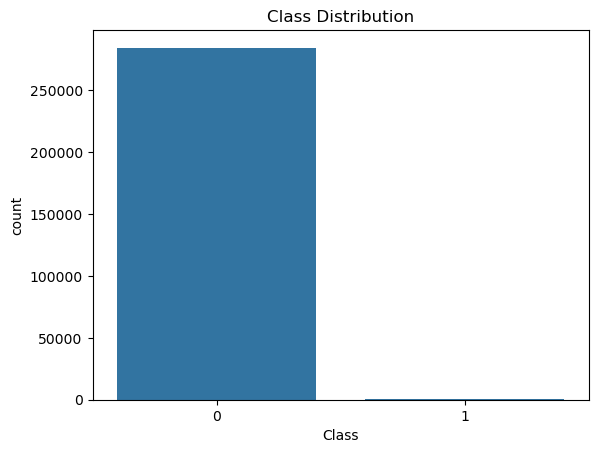

In [12]:
# Check for missing values
print(df.isnull().sum())

# Check the data types
print(df.dtypes)

# Summary statistics
print(df.describe())

# Class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

## ii. Visualizations

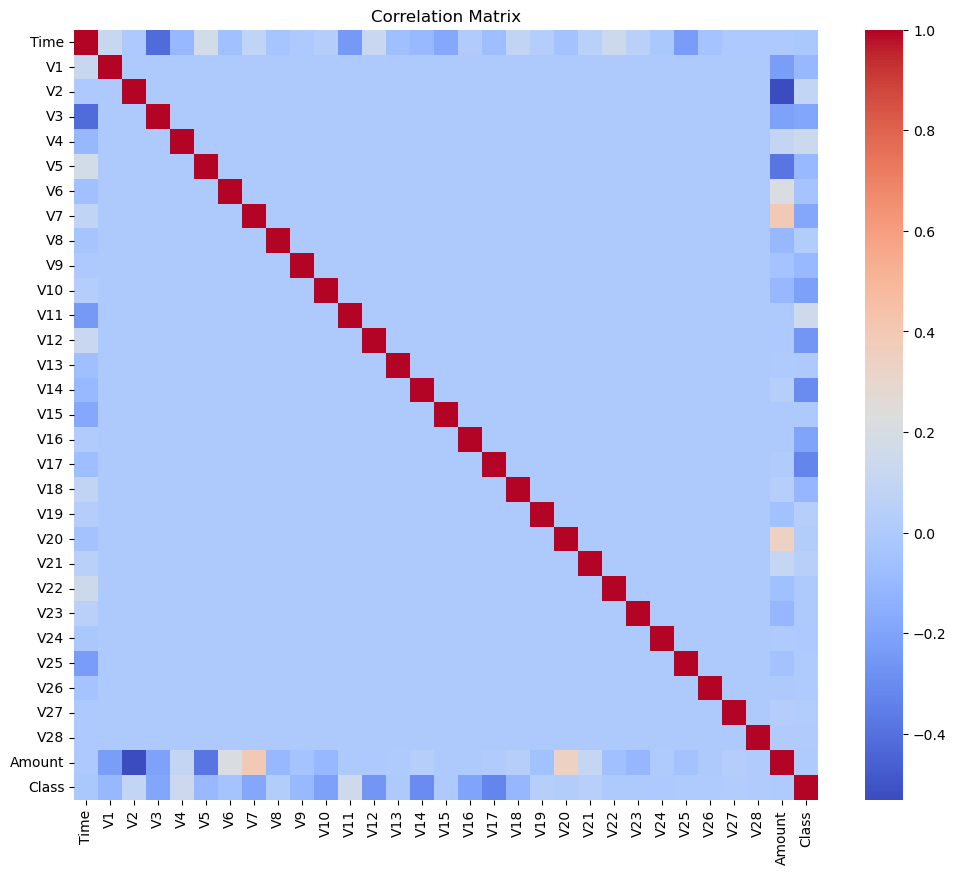

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 4. Data Cleaning

## Handling Missing Values and Outliers

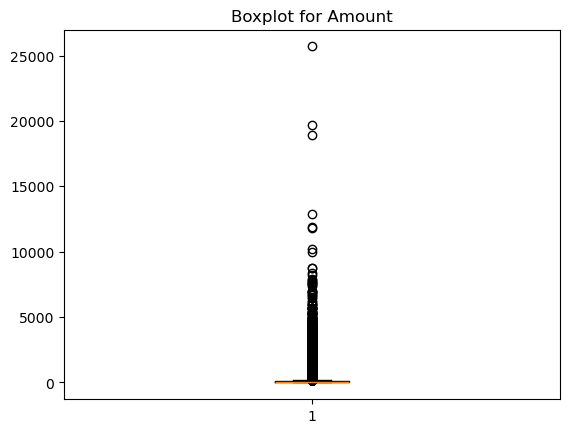

In [14]:
# Check for outliers in 'Amount'
plt.boxplot(df['Amount'])
plt.title('Boxplot for Amount')
plt.show()

# Optionally, remove outliers based on business logic
df = df[df['Amount'] < 10000]  # Example threshold

## 5. Dealing with Imbalanced Data

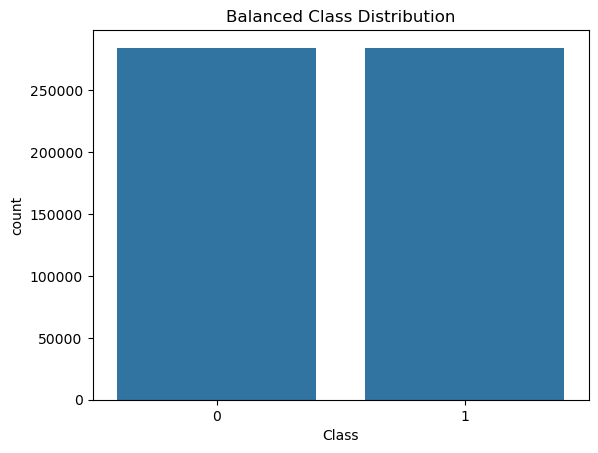

In [15]:
# Separate features and target variable
X = df.drop(['Class'], axis=1)
y = df['Class']

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
sns.countplot(x=y_resampled)
plt.title('Balanced Class Distribution')
plt.show()

## 6. Feature Engineering

In [16]:
# Example of feature engineering: Log transformation
df['Log_Amount'] = np.log(df['Amount'] + 1)  # Avoid log(0) issue

## 7. Train/Test Split

In [17]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

## 8. Model Selection and Training

In [18]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## 9. Model Validation

In [19]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

[[56846    16]
 [    0 56861]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       1.00      1.00      1.00     56861

    accuracy                           1.00    113723
   macro avg       1.00      1.00      1.00    113723
weighted avg       1.00      1.00      1.00    113723

ROC AUC Score: 0.9999986204199055


## 10. Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_